In [4]:
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
# Load data to a dataframe
with open('results/test_1.yaml') as f:
    d = yaml.load(f)

df = pd.DataFrame(columns=['run', 'ndim', 'method', 'f(x)', 'nfev', 'ng', 'time'])

for k1 in d.keys():
    for k2 in d[k1].keys():
        for k3 in d[k1][k2].keys():
            s = pd.Series({
                'run': int(k1.split('=')[-1]),
                'ndim': int(k2.split('=')[-1]),
                'method': k3.split('=')[-1],
                'f(x)': float(d[k1][k2][k3]['f(x)']),
                'nfev': float(d[k1][k2][k3]['nfev']),
                'ng': float(d[k1][k2][k3]['ng']),
                'time': float(d[k1][k2][k3]['time'])
            })
            df = df.append(s, ignore_index=True)

df

,run,ndim,method,f(x),nfev,ng,time
0,0,128,differential_evolution,8.410859e+03,12812800.0,1000.0,8647.003468
1,0,128,ga,6.161743e+01,1426003.0,1000.0,132.101891
2,0,128,monte_carlo,1.020576e+04,10400.0,104.0,0.359083
3,0,16,differential_evolution,2.223820e+02,1601600.0,1000.0,172.545326
4,0,16,ga,3.782520e-07,534703.0,762.0,48.985949
...,...,...,...,...,...,...,...
178,8,4,ga,0.000000e+00,12339616.0,367.0,17.596045
179,8,4,monte_carlo,2.127219e+01,10600.0,106.0,0.224746
180,8,8,differential_evolution,1.054067e+01,800800.0,1000.0,69.391912
181,8,8,ga,4.997468e+00,12481979.0,479.0,24.229662


In [37]:
# Calculate average results
summary = df.groupby(['method', 'ndim']).mean()
summary

f(x)          nfev           ng  \
method                 ndim                                            
differential_evolution 2         0.000000  1.517778e+04    74.888889   
                       4         0.000000  8.382222e+04   208.555556   
                       8         9.204947  8.008000e+05  1000.000000   
                       16      221.220977  1.601600e+06  1000.000000   
                       32     1076.814538  3.203200e+06  1000.000000   
                       64     3401.418794  6.406400e+06  1000.000000   
                       128    8545.303343  1.281280e+07  1000.000000   
ga                     2         0.000000  6.128723e+06   262.666667   
                       4         0.111055  6.242409e+06   382.444444   
                       8         2.443207  6.402031e+06   537.111111   
                       16        0.222135  6.678242e+06   929.666667   
                       32        2.141529  6.975342e+06  1000.000000   
                       64        8.922982  6.509837e+06  1000.000000   
                       128      66.396122  6.806937e+06  1000.000000   
monte_carlo            2         1.383053  1.051111e+04   105.111111   
                       4        27.964433  1.057778e+04   105.777778   
                       8       153.751252  1.056667e+04   105.666667   
                       16      674.368106  1.052222e+04   105.222222   
                       32     1862.344551  1.050000e+04   105.000000   
                       64     4619.567340  1.051250e+04   105.125000   
                       128   10509.259118  1.058750e+04   105.875000   

                                    time  
method                 ndim               
differential_evolution 2        0.905559  
                       4        5.459513  
                       8       64.114651  
                       16     172.523835  
                       32     540.049131  
                       64    1910.115580  
                       128   7530.398492  
ga                     2       12.292362  
                       4       18.430967  
                       8       27.325520  
                       16      54.382757  
                       32      67.623025  
                       64      90.250467  
                       128    132.155163  
monte_carlo            2        0.266502  
                       4        0.236378  
                       8        0.277358  
                       16       0.360845  
                       32       0.326185  
                       64       0.302112  
                       128      0.364324

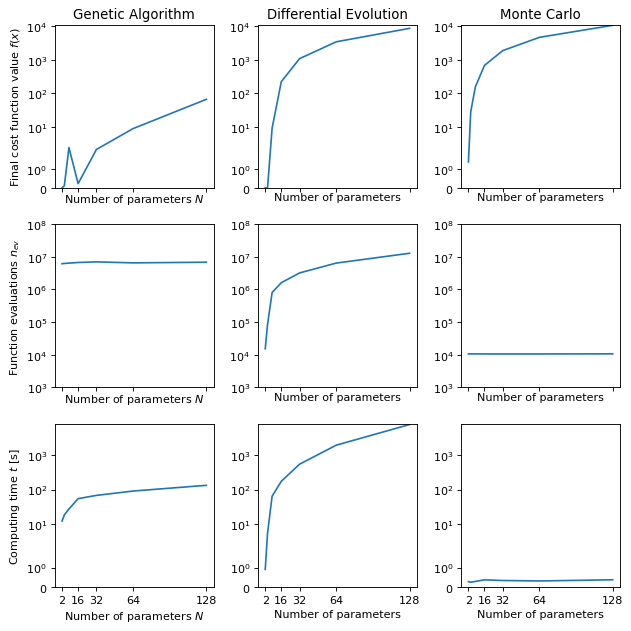

In [93]:
fig, axes = plt.subplots(3, 3, sharey=False, sharex=True, figsize=(8, 8), dpi=80)

ax = axes[0, 0]
ax.set_xticks([2, 16, 32, 64, 128])
ax.set_ylim((0, 11000))
ax.set_yscale('symlog')
ax.set_xlabel('Number of parameters $N$')
ax.set_ylabel('Final cost function value $f(x)$')
ax.set_title('Genetic Algorithm')
ax.plot(summary.loc['ga', 'f(x)'])

ax = axes[0, 1]
ax.set_ylim((0, 11000))
ax.set_yscale('symlog')
ax.set_xlabel('Number of parameters')
ax.set_title('Differential Evolution')
ax.plot(summary.loc['differential_evolution', 'f(x)'])

ax = axes[0, 2]
ax.set_ylim((0, 11000))
ax.set_yscale('symlog')
ax.set_xlabel('Number of parameters')
ax.set_title('Monte Carlo')
ax.plot(summary.loc['monte_carlo', 'f(x)'])

ax = axes[1, 0]
ax.set_ylim((1e3, 1e8))
ax.set_yscale('symlog')
ax.set_xlabel('Number of parameters $N$')
ax.set_ylabel('Function evaluations $n_{ev}$')
ax.plot(summary.loc['ga', 'nfev'])

ax = axes[1, 1]
ax.set_ylim((1e3, 1e8))
ax.set_yscale('symlog')
ax.set_xlabel('Number of parameters')
ax.plot(summary.loc['differential_evolution', 'nfev'])

ax = axes[1, 2]
ax.set_ylim((1e3, 1e8))
ax.set_yscale('symlog')
ax.set_xlabel('Number of parameters')
ax.plot(summary.loc['monte_carlo', 'nfev'])

ax = axes[2, 0]
ax.set_ylim((0, 8000))
ax.set_yscale('symlog')
ax.set_xlabel('Number of parameters $N$')
ax.set_ylabel('Computing time $t$ [s]')
ax.plot(summary.loc['ga', 'time'])

ax = axes[2, 1]
ax.set_ylim((0, 8000))
ax.set_yscale('symlog')
ax.set_xlabel('Number of parameters')
ax.plot(summary.loc['differential_evolution', 'time'])

ax = axes[2, 2]
ax.set_ylim((0, 8000))
ax.set_yscale('symlog')
ax.set_xlabel('Number of parameters')
ax.plot(summary.loc['monte_carlo', 'time'])

plt.tight_layout()

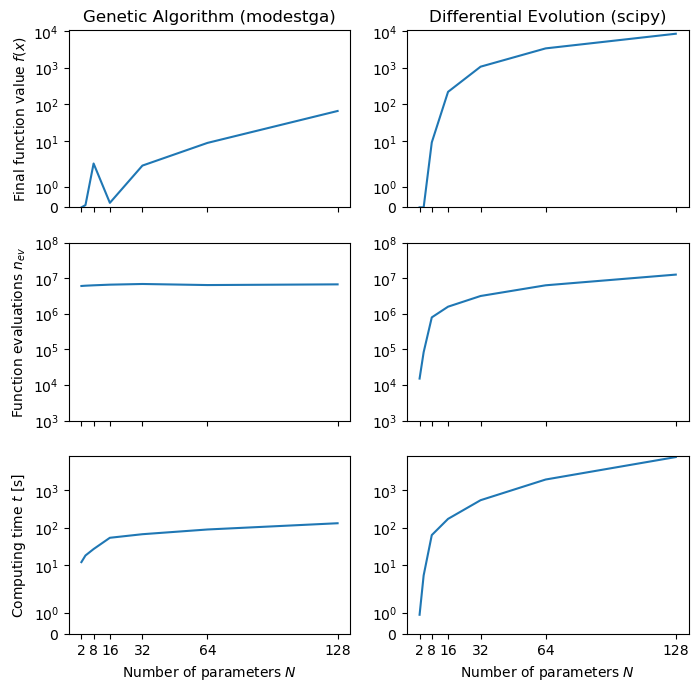

In [102]:
fig, axes = plt.subplots(3, 2, sharey=False, sharex=True, figsize=(8, 8), dpi=100)

ax = axes[0, 0]
ax.set_xticks([2, 8, 16, 32, 64, 128])
ax.set_ylim((0, 11000))
ax.set_yscale('symlog')
ax.set_ylabel('Final function value $f(x)$')
ax.set_title('Genetic Algorithm (modestga)')
ax.plot(summary.loc['ga', 'f(x)'])

ax = axes[0, 1]
ax.set_ylim((0, 11000))
ax.set_yscale('symlog')
ax.set_title('Differential Evolution (scipy)')
ax.plot(summary.loc['differential_evolution', 'f(x)'])

ax = axes[1, 0]
ax.set_ylim((1e3, 1e8))
ax.set_yscale('symlog')
ax.set_ylabel('Function evaluations $n_{ev}$')
ax.plot(summary.loc['ga', 'nfev'])

ax = axes[1, 1]
ax.set_ylim((1e3, 1e8))
ax.set_yscale('symlog')
ax.plot(summary.loc['differential_evolution', 'nfev'])

ax = axes[2, 0]
ax.set_ylim((0, 8000))
ax.set_yscale('symlog')
ax.set_xlabel('Number of parameters $N$')
ax.set_ylabel('Computing time $t$ [s]')
ax.plot(summary.loc['ga', 'time'])

ax = axes[2, 1]
ax.set_ylim((0, 8000))
ax.set_yscale('symlog')
ax.set_xlabel('Number of parameters $N$')
ax.plot(summary.loc['differential_evolution', 'time'])